# Задача 1. Уникальные ip


Дан файл `access_log.txt`, строки которого начинаются с ip пользователей. Найти:

1. количество уникальных ip
2. 5 самых часто встречающихся и то, сколько раз они встречаются.


In [25]:
import re

# Читаем файл
with open('access_log.txt', 'r') as f:
    logs = f.read().splitlines()


def get_ip(log: str) -> str:
    '''
    Возвращает IP из лога с помощью регулярки
    :param log: лог
    :return: ip лога
    '''
    try:
        match = re.match('\d*\.\d*\.\d*\.\d*', log)
        vals = match.span()
        return log[vals[0]:vals[1]]

    except:
        pass


unique_ips = set()

for log in logs:
    ip = get_ip(log)
    unique_ips.add(ip)

total_ips = len(unique_ips)
print(f'Всего уникальных IP: %s' % total_ips)

Всего уникальных IP: 2298


# Задача 2. Класс

Напишите класс для интегрирования функций одной переменной без особенностей на конечном интервале.
Что у класса должно быть:

1. Выбор способа интегрирование: `trapeze` и `rectangle` (интегрирование методом трапеций и прямоугольников соответственно)

2. Явное указание интервала интегрирования и количества отрезков, на которые этот интервал разбивается

3. Возможность передать любую функцию одной переменной (которая на вход принимает вещественное число и возвращает тоже вещественное число), предполагается, что функция особенностей не имеет


Пример вызова:

trapeze_integrator = Integrator(-1, 1, 1000, 'trapeze')

x3 = lambda x: x\*\*3

trapeze_integrator.integrate(x3)

Ну и результат такого интегрирования должен быть разумным) Для примера должно получиться что-то около 0.

In [26]:
import numpy as np
from typing import Callable


class Integrator:
    def __init__(self,
                 left: float,
                 right: float,
                 parts_num: int,
                 method: str):

        self.left = left
        self.right = right
        self.parts_num = parts_num
        self.method = method

        self.check_arguments()

        # Генерирую сетку и считаю её шаг
        self.values = np.linspace(left, right, parts_num)
        self.step = (right - left) / parts_num

    def check_arguments(self):
        '''
        Проверяет аргументы
        :return:
        '''
        condition = self.method not in (['rectangle', 'trapeze'])
        if condition:
            msg = 'Поддерживаются только методы: rectangle, trapeze'
            raise TypeError(msg)

        condition = self.left >= self.right
        if condition:
            msg = 'Левая граница интервала должна быть строго меньше правой'
            raise TypeError(msg)

        condition = self.parts_num <= 0
        if condition:
            msg = 'Число отрезков должно быть строго больше нуля'
            raise TypeError(msg)

    def trapeze_(self, function: Callable) -> float:
        '''
        Рассчитывает интеграл методом трапеций
        :param function: функция для интегрирования
        :return: значение определенного интеграла
        '''
        value = np.sum([function(x) for x in self.values[:-1]]) * self.step
        # print(value)
        return np.round(value, 3)

    def rectangle_(self, function: Callable) -> float:
        '''
        Рассчитывает интеграл методом левых прямоугольников
        :param function: функция для интегрирования
        :return: значение определенного интеграла
        '''

        value_1 = np.sum([function(x) for x in self.values[1:-1]]) * self.step
        value_2 = (self.values[0] / 2 + self.values[-1] / 2) * self.step
        value = (value_1 + value_2)
        return np.round(value, 3)

    def integrate(self, function: Callable):
        '''
        Возвращает значение интеграла
        :param function: вызываемая функция одной переменной
        :return: значение интеграла
        '''

        if self.method == 'rectangle':
            return self.rectangle_(function)

        if self.method == 'trapeze':
            return self.trapeze_(function)

### Тесты
# Метод трапеций
f = lambda x: x
integr = Integrator(0, 100, int(1e6), 'trapeze')
integr.integrate(f)

# Метод прямоугольника
f = lambda x: x
integr = Integrator(0, 100, int(1e6), 'rectangle')
integr.integrate(f)

# Ошибка метода
f = lambda x: x
# integr = Integrator(0, 100, int(1e6), 'this_method_does_not_exists')
# integr.integrate(f)

# Ошибка границ интервала
f = lambda x: x
# integr = Integrator(0, -12, int(1e6), 'rectangle')
# integr.integrate(f)

# Ошибка отрицательных отрезков
f = lambda x: x
# integr = Integrator(0, 100, -2, 'rectangle')
# integr.integrate(f)

# Задача 3. NumPy

Вам дан массив с числами размера $x*n$ (это размер столбца) на $m$. Напишите функцию `bucket_aggregate(arr: np.array, x: int)-> np.array`, которая делает следующее преобразование:

Каждый столбец разбивается на x бакетов одинаковой длины n и внутри каждого бакета считается среднее значение.
На выходе получается массив размера $n$ на $m$. Гарантируется, что длина столбца входного массива нацело делится на x. ("корректную" работу для массива 10\*10 и 3 бакетов предусматривать не обязательно). Ошибки вычислений, связанные с ограниченной точностью типа Float, пытаться вылечить не обязательно.

**Пример**

**Вход**

Массив **a**

1 1 1

2 3 3

4 5 6

1 2 3


**Применение**

    bucket_aggregate(a, 2)

**Выход**

1.5 2   2

2.5 3.5 4.5


In [27]:
import numpy as np

np.random.seed = 42


def bucket_aggregate(arr, x):
    slices = [arr[i:i + x] for i in np.arange(0, arr.shape[0], int(arr.shape[0] / x))]
    vals = []

    for slice in slices:
        vals.append(np.mean(slice, axis=0))

    return np.array(vals)

# Задача 4. Про pandas

Дан датафрейм, содержащий распаршенную с сайта reverb информацию об объявлениях о продаже электрогитар.
Поля там такие:

`title` - заголовок объявления
`description` и `text` - что-то из описания объявления
`price` - цена в долларах
`params_dict` - словарь параметров (чтобы считать его, можете воспользоваться `eval`)

Вопросы:

1. Сколько возможных ключей есть в params_dict
2. Какой инструмент самый дорогой и сколько он стоит
3. Какой самый частый бренд (если известен)
4. Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как? (ответом будет график)

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ast

from collections import Counter

df = pd.read_csv('reverb.csv', index_col=0)
df.head()

,title,description,text,param_dict,price
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92"
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55"
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,"$1,055.53"
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62"
4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,$575.55


In [29]:
# Вопрос 1: Сколько возможных ключей есть в params_dict
# Ответ: 33

keys_list = []

for param_dict in df['param_dict']:
    keys = list(ast.literal_eval(param_dict).keys())
    keys_list.extend(keys)

unique_keys = set(keys_list)
print(f'Всего уникальных ключей %i' % len(unique_keys))

# Вопрос 2: Какой инструмент самый дорогой и сколько он стоит
# Ответ: Eric Clapton | Reverb 387363.74

df['price_numeric'] = df['price'].apply(lambda x: float(x[1:].replace(',','')))
display(df[['title','price_numeric']]\
        .sort_values('price_numeric', ascending=False).head(1)
        )

# Вопрос 3: Какой самый частый бренд (если известен)
# Ответ: Fender, 3250 раз

params = df.param_dict.apply(lambda x: ast.literal_eval(x)).copy()

brands = [g['Brand'] for g in params]
display(pd.Series(Counter(brands))\
        .sort_values(ascending=False)\
        .head(1)
        )

Всего уникальных ключей 33


,title,price_numeric
17127,Eric Clapton | Reverb,387363.74


Fender    3250
dtype: int64

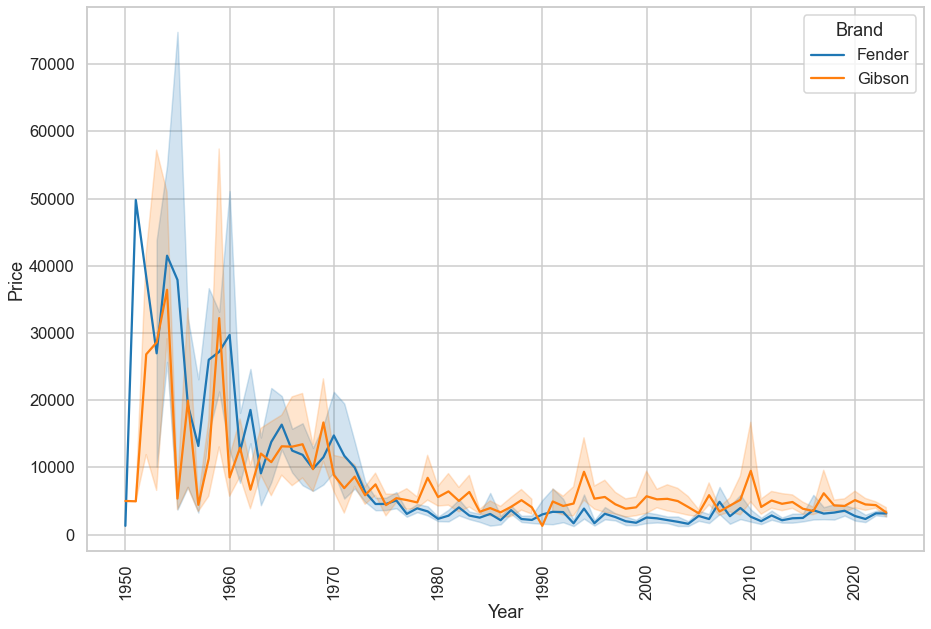

In [30]:
# Вопрос 4 Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как?
# ответом будет график

df['brands'] = brands
fg_df = df.query('brands in ["Fender","Gibson"]')
params = fg_df.param_dict.apply(lambda x: ast.literal_eval(x)).copy()
years = [g['Year'] if 'Year' in g.keys() else 'none' for g in params]
years = [int(y) if y.isdigit() else None for y in years ]
prices = fg_df['price_numeric']

data = np.array([years,prices,fg_df['brands']]).T
df_yp = pd.DataFrame(data, columns = ['Year','Price','Brand'])
# Чистим от неадекватных значений
df_yp = df_yp[(~df_yp['Year'].isna())
              &(df_yp['Year'] >= 1950)
              &(df_yp['Year'] <= 2023)
              ]

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))

sns.lineplot(x='Year',
             y='Price',
             data=df_yp,
             hue='Brand'
             )

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Count'>

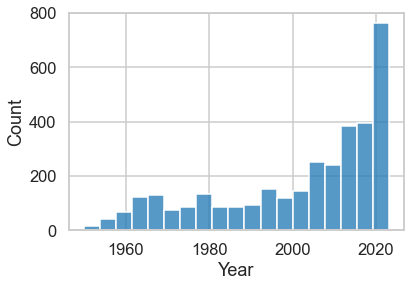

In [31]:
# Видно, что до 2000 года наблюдений мало. Попробуем взять агрегаты
sns.histplot(x='Year', data=df_yp)

/var/folders/1f/1t7knmh95bg_g1s30p6r8mp40000gn/T/ipykernel_71203/1832220398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.sort_values('Year')\
/var/folders/1f/1t7knmh95bg_g1s30p6r8mp40000gn/T/ipykernel_71203/1832220398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.sort_values('Year')\


<AxesSubplot:xlabel='Year', ylabel='Price'>

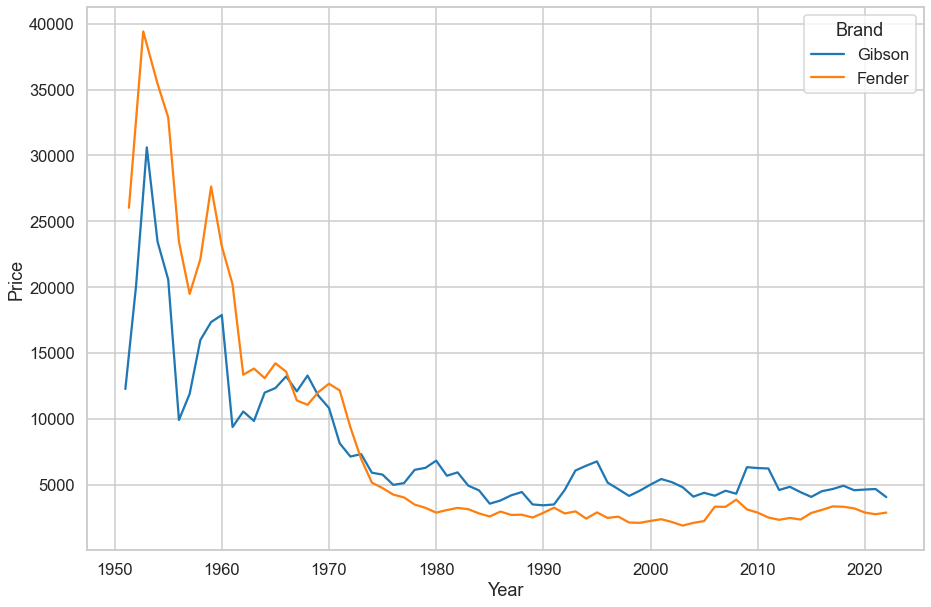

In [32]:
def get_rolling(data, window=3):
    '''
    Строит скользящее среднее по окну для датафрейма
    :param data: датафрейм
    :param window: размер окна (в годах)
    :return: Датафрейм с посчитанными агрегатами
    '''
    data = data.sort_values('Year')\
        .groupby(['Year'], as_index=False)\
        .mean()\
        .rolling(window)\
        .mean()

    return data

df_gibson_roll = get_rolling(df_yp.query('Brand == "Gibson"'))
df_gibson_roll['Brand'] = 'Gibson'
df_fender_roll = get_rolling(df_yp.query('Brand == "Fender"'))
df_fender_roll['Brand'] = 'Fender'

df_yp_roll = pd.concat([df_gibson_roll, df_fender_roll]).reset_index()

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))

sns.lineplot(x='Year',
             y='Price',
             data=df_yp_roll,
             hue='Brand'
             )


# Задача 5. Про парсинг информации

Есть сайт https://nplus1.ru/ , новости за дату на нем можно увидеть на страницах типа https://nplus1.ru/news/2023/03/28

Используя парсер, посчитайте суммарную длину текстов статей (в количестве слов или в количестве символов, как вам будет удобнее), которые были на N+1 в списке новостей в Июле 2023 года (пройтись по всем датам июля, собрать тексты статей, посчитать длину в словах/символах).

Пользуйтесь любыми удобными вам библиотеками

In [33]:
import requests

from tqdm import tqdm
from selenium import webdriver
from bs4 import BeautifulSoup

In [34]:
headers = { 'Accept-Language' : 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
            'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
            }

def get_links(soup, domain):
    '''
    Ищет все ссылки на новости со страницы
    :return: список строк - ссылок
    '''
    links = []
    pages = soup.find('section',class_=r'mb-10').find_all('a', class_="n1_climb_4")

    for link in pages:
        try:
            links.append(link.get('href'))
        except:
            pass
    links = [domain + l if 'https' not in l else l for l in links]
    return links

def get_chars(link):
    '''
    Считает число символов в новости по ссылке
    :return: число символов
    '''
    mystr = requests.get(link,
                         headers=headers).text
    soup = BeautifulSoup(mystr)
    try:
        text = soup.find_all('div', class_="col-span-6")[5].text
        chars = len(''.join(text.splitlines()).strip().replace(' ',''))
    except:
        pass
    return chars

In [37]:
basis = 'https://nplus1.ru/news/2023/07/'
urls = [basis + str(x) for x in range(1, 32)]

links=[]
driver = webdriver.Chrome('../chromedriver')

# Собираем все ссылки на новости
for url in tqdm(urls):
    driver.get(url)
    pageSource = driver.page_source

    soup = BeautifulSoup(pageSource)#.find('section', class_='mb-10')
    links.extend(get_links(soup, domain=url))
driver.quit()

# Считаем число символов в каждой новости
symbols = 0
for link in tqdm(links):
    symbols += get_chars(link)
    # time.sleep(0.1)

print(symbols)

100%|██████████| 219/219 [02:07<00:00,  1.72it/s]

657092
